# House Prices - Advanced Regression Techniques

Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

For this project I will use the steps in CRISP-DM, or Cross-Industry Standard Process for Data Mining. It is a widely-used framework for guiding data mining projects from start to finish.

## Step 1: Business Understanding

Use features not typically used in searching for a home to predict the price of some homes.

## Step 2: Data Understanding

### Import Packages

In [53]:
import pandas as pd
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

from IPython.display import display

from itertools import cycle

import datetime as dt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load the data

In [54]:
train_df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

### View the data

In [55]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

train_df has one more column than test_df, let's see what that column is:

In [56]:
train_df[[column for column in train_df.columns if column not in test_df.columns]].columns

Index(['SalePrice'], dtype='object')

This makes sense because SalePrice is our target variable, since we want to predict the sales price for each house in test_df using the data from train_df.

In [57]:
train_df["SalePrice"].isnull().sum()

np.int64(0)

No house in train_df is missing a SalePrice, so let's move on to preparing the data.

## Step 3: Data Preparation

Now we can start cleaning up the dataframes so they're easier to work with, and give us more accurate results.

### Clean up the column names

In [58]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


From an initial look at the dataframe, the column names are already without spaces and look good in PascalCase so we can keep them as is.

### Clean up the values

In [59]:
def display_column_value_counts(df):
    for column in df.columns:
        display(df[column].value_counts().sort_index())
        print("\n")

In [60]:
display_column_value_counts(train_df)

Id
1       1
2       1
3       1
4       1
5       1
       ..
1456    1
1457    1
1458    1
1459    1
1460    1
Name: count, Length: 1460, dtype: int64

MSSubClass
20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: count, dtype: int64

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: count, dtype: int64

LotFrontage
21.0     23
24.0     19
30.0      6
32.0      5
33.0      1
         ..
160.0     1
168.0     1
174.0     2
182.0     1
313.0     2
Name: count, Length: 110, dtype: int64

LotArea
1300      1
1477      1
1491      1
1526      1
1533      2
         ..
70761     1
115149    1
159000    1
164660    1
215245    1
Name: count, Length: 1073, dtype: int64

Street
Grvl       6
Pave    1454
Name: count, dtype: int64

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

LotShape
IR1    484
IR2     41
IR3     10
Reg    925
Name: count, dtype: int64

LandContour
Bnk      63
HLS      50
Low      36
Lvl    1311
Name: count, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

LotConfig
Corner      263
CulDSac      94
FR2          47
FR3           4
Inside     1052
Name: count, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber      38
Veenker     11
Name: count, dtype: int64

Condition1
Artery      48
Feedr       81
Norm      1260
PosA         8
PosN        19
RRAe        11
RRAn        26
RRNe         2
RRNn         5
Name: count, dtype: int64

Condition2
Artery       2
Feedr        6
Norm      1445
PosA         1
PosN         2
RRAe         1
RRAn         1
RRNn         2
Name: count, dtype: int64

BldgType
1Fam      1220
2fmCon      31
Duplex      52
Twnhs       43
TwnhsE     114
Name: count, dtype: int64

HouseStyle
1.5Fin    154
1.5Unf     14
1Story    726
2.5Fin      8
2.5Unf     11
2Story    445
SFoyer     37
SLvl       65
Name: count, dtype: int64

OverallQual
1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: count, dtype: int64

OverallCond
1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
Name: count, dtype: int64

YearBuilt
1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Name: count, Length: 112, dtype: int64

YearRemodAdd
1950    178
1951      4
1952      5
1953     10
1954     14
       ... 
2006     97
2007     76
2008     40
2009     23
2010      6
Name: count, Length: 61, dtype: int64

RoofStyle
Flat         13
Gable      1141
Gambrel      11
Hip         286
Mansard       7
Shed          2
Name: count, dtype: int64

RoofMatl
ClyTile       1
CompShg    1434
Membran       1
Metal         1
Roll          1
Tar&Grv      11
WdShake       5
WdShngl       6
Name: count, dtype: int64

Exterior1st
AsbShng     20
AsphShn      1
BrkComm      2
BrkFace     50
CBlock       1
CemntBd     61
HdBoard    222
ImStucc      1
MetalSd    220
Plywood    108
Stone        2
Stucco      25
VinylSd    515
Wd Sdng    206
WdShing     26
Name: count, dtype: int64

Exterior2nd
AsbShng     20
AsphShn      3
Brk Cmn      7
BrkFace     25
CBlock       1
CmentBd     60
HdBoard    207
ImStucc     10
MetalSd    214
Other        1
Plywood    142
Stone        5
Stucco      26
VinylSd    504
Wd Sdng    197
Wd Shng     38
Name: count, dtype: int64

MasVnrType
BrkCmn      15
BrkFace    445
Stone      128
Name: count, dtype: int64

MasVnrArea
0.0       861
1.0         2
11.0        1
14.0        1
16.0        7
         ... 
1115.0      1
1129.0      1
1170.0      1
1378.0      1
1600.0      1
Name: count, Length: 327, dtype: int64

ExterQual
Ex     52
Fa     14
Gd    488
TA    906
Name: count, dtype: int64

ExterCond
Ex       3
Fa      28
Gd     146
Po       1
TA    1282
Name: count, dtype: int64

Foundation
BrkTil    146
CBlock    634
PConc     647
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: count, dtype: int64

BsmtCond
Fa      45
Gd      65
Po       2
TA    1311
Name: count, dtype: int64

BsmtExposure
Av    221
Gd    134
Mn    114
No    953
Name: count, dtype: int64

BsmtFinType1
ALQ    220
BLQ    148
GLQ    418
LwQ     74
Rec    133
Unf    430
Name: count, dtype: int64

BsmtFinSF1
0       467
2         1
16        9
20        5
24       12
       ... 
1904      1
2096      1
2188      1
2260      1
5644      1
Name: count, Length: 637, dtype: int64

BsmtFinType2
ALQ      19
BLQ      33
GLQ      14
LwQ      46
Rec      54
Unf    1256
Name: count, dtype: int64

BsmtFinSF2
0       1293
28         1
32         1
35         1
40         1
        ... 
1080       1
1085       1
1120       1
1127       1
1474       1
Name: count, Length: 144, dtype: int64

BsmtUnfSF
0       118
14        1
15        1
23        2
26        1
       ... 
2042      1
2046      1
2121      1
2153      1
2336      1
Name: count, Length: 780, dtype: int64

TotalBsmtSF
0       37
105      1
190      1
264      3
270      1
        ..
3094     1
3138     1
3200     1
3206     1
6110     1
Name: count, Length: 721, dtype: int64

Heating
Floor       1
GasA     1428
GasW       18
Grav        7
OthW        2
Wall        4
Name: count, dtype: int64

HeatingQC
Ex    741
Fa     49
Gd    241
Po      1
TA    428
Name: count, dtype: int64

CentralAir
N      95
Y    1365
Name: count, dtype: int64

Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1334
Name: count, dtype: int64

1stFlrSF
334     1
372     1
438     1
480     1
483     7
       ..
2633    1
2898    1
3138    1
3228    1
4692    1
Name: count, Length: 753, dtype: int64

2ndFlrSF
0       829
110       1
167       1
192       1
208       1
       ... 
1611      1
1796      1
1818      1
1872      1
2065      1
Name: count, Length: 417, dtype: int64

LowQualFinSF
0      1434
53        1
80        3
120       1
144       1
156       1
205       1
232       1
234       1
360       2
371       1
384       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
528       1
572       1
Name: count, dtype: int64

GrLivArea
334     1
438     1
480     1
520     1
605     1
       ..
3627    1
4316    1
4476    1
4676    1
5642    1
Name: count, Length: 861, dtype: int64

BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64

BsmtHalfBath
0    1378
1      80
2       2
Name: count, dtype: int64

FullBath
0      9
1    650
2    768
3     33
Name: count, dtype: int64

HalfBath
0    913
1    535
2     12
Name: count, dtype: int64

BedroomAbvGr
0      6
1     50
2    358
3    804
4    213
5     21
6      7
8      1
Name: count, dtype: int64

KitchenAbvGr
0       1
1    1392
2      65
3       2
Name: count, dtype: int64

KitchenQual
Ex    100
Fa     39
Gd    586
TA    735
Name: count, dtype: int64

TotRmsAbvGrd
2       1
3      17
4      97
5     275
6     402
7     329
8     187
9      75
10     47
11     18
12     11
14      1
Name: count, dtype: int64

Functional
Maj1      14
Maj2       5
Min1      31
Min2      34
Mod       15
Sev        1
Typ     1360
Name: count, dtype: int64

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

FireplaceQu
Ex     24
Fa     33
Gd    380
Po     20
TA    313
Name: count, dtype: int64

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: count, dtype: int64

GarageYrBlt
1900.0     1
1906.0     1
1908.0     1
1910.0     3
1914.0     2
          ..
2006.0    59
2007.0    49
2008.0    29
2009.0    21
2010.0     3
Name: count, Length: 97, dtype: int64

GarageFinish
Fin    352
RFn    422
Unf    605
Name: count, dtype: int64

GarageCars
0     81
1    369
2    824
3    181
4      5
Name: count, dtype: int64

GarageArea
0       81
160      2
164      1
180      9
186      1
        ..
1220     1
1248     1
1356     1
1390     1
1418     1
Name: count, Length: 441, dtype: int64

GarageQual
Ex       3
Fa      48
Gd      14
Po       3
TA    1311
Name: count, dtype: int64

GarageCond
Ex       2
Fa      35
Gd       9
Po       7
TA    1326
Name: count, dtype: int64

PavedDrive
N      90
P      30
Y    1340
Name: count, dtype: int64

WoodDeckSF
0      761
12       2
24       2
26       2
28       2
      ... 
668      1
670      1
728      1
736      1
857      1
Name: count, Length: 274, dtype: int64

OpenPorchSF
0      656
4        1
8        1
10       1
11       1
      ... 
406      1
418      1
502      1
523      1
547      1
Name: count, Length: 202, dtype: int64

EnclosedPorch
0      1252
19        1
20        1
24        1
30        1
       ... 
301       1
318       1
330       1
386       1
552       1
Name: count, Length: 120, dtype: int64

3SsnPorch
0      1436
23        1
96        1
130       1
140       1
144       2
153       1
162       1
168       3
180       2
182       1
196       1
216       2
238       1
245       1
290       1
304       1
320       1
407       1
508       1
Name: count, dtype: int64

ScreenPorch
0      1344
40        1
53        1
60        1
63        1
       ... 
385       1
396       1
410       1
440       1
480       1
Name: count, Length: 76, dtype: int64

PoolArea
0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: count, dtype: int64

PoolQC
Ex    2
Fa    2
Gd    3
Name: count, dtype: int64

Fence
GdPrv     59
GdWo      54
MnPrv    157
MnWw      11
Name: count, dtype: int64

MiscFeature
Gar2     2
Othr     2
Shed    49
TenC     1
Name: count, dtype: int64

MiscVal
0        1408
54          1
350         1
400        11
450         4
480         2
500         8
560         1
600         4
620         1
700         5
800         1
1150        1
1200        2
1300        1
1400        1
2000        4
2500        1
3500        1
8300        1
15500       1
Name: count, dtype: int64

MoSold
1      58
2      52
3     106
4     141
5     204
6     253
7     234
8     122
9      63
10     89
11     79
12     59
Name: count, dtype: int64

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

SaleType
COD        43
CWD         4
Con         2
ConLD       9
ConLI       5
ConLw       5
New       122
Oth         3
WD       1267
Name: count, dtype: int64

SaleCondition
Abnorml     101
AdjLand       4
Alloca       12
Family       20
Normal     1198
Partial     125
Name: count, dtype: int64

SalePrice
34900     1
35311     1
37900     1
39300     1
40000     1
         ..
582933    1
611657    1
625000    1
745000    1
755000    1
Name: count, Length: 663, dtype: int64

Some Findings:

- The Id column does not contribute to the predictive power of the model and can potentially cause issues with performnace and accuracy, so remove it.
- Every value in the LotFrontage column is an int, so let's change the type of this column from float to int for memory efficiency.
- Utilites only has 1 value for NoSeWa, so get rid of this column since it's highly imbalanced and won't help the model much.
- The values in MasVnrArea can also be changed to integers.

The Id column from test_df will be important for us when we make the csv file for our findings so let's keep them in a separate variable.

In [61]:
ids = test_df["Id"]

First, we remove the columns that offer little to our model.

In [62]:
for df in [train_df, test_df]:
    df.drop(columns=["Id", "Utilities"], inplace=True)

Next, we can make the LotFrontage and MasVnrArea columns have integer values, but before that, let's view the value counts of the columns to see if we need to fill in any empty values in some of the columns with 0 or another value.

### Fill in missing values

In [63]:
for column in train_df.columns:
    values = train_df[column].isnull().sum()
    if values:
        print(column, values, train_df[column].dtype)

LotFrontage 259 float64
Alley 1369 object
MasVnrType 872 object
MasVnrArea 8 float64
BsmtQual 37 object
BsmtCond 37 object
BsmtExposure 38 object
BsmtFinType1 37 object
BsmtFinType2 38 object
Electrical 1 object
FireplaceQu 690 object
GarageType 81 object
GarageYrBlt 81 float64
GarageFinish 81 object
GarageQual 81 object
GarageCond 81 object
PoolQC 1453 object
Fence 1179 object
MiscFeature 1406 object


The only columns with null values that have a data type of float are LotFrontage, MasVnrArea, and GarageYrBlt. LotFrontage and MasVnrArea can have their null values set to 0, but for GarageYrBlt, we can fill in the null values with the value of the average for that column, and change the data type for the column from float to int.

In [64]:
def fill_in_null_values(df):
    for column in ["LotFrontage", "MasVnrArea"]:
        # when you use inplace=True, the method modifies the DataFrame in place and returns None.
        # this means you cannot chain it with other operations or assign it back to a column.
        df[column] = df[column].fillna(0).astype(int)

fill_in_null_values(train_df), fill_in_null_values(test_df)

(None, None)

In [65]:
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(round(train_df["GarageYrBlt"].mean())).astype(int)
test_df["GarageYrBlt"] = test_df["GarageYrBlt"].fillna(round(test_df["GarageYrBlt"].mean())).astype(int)

Now we have 0 for a few columns, and a better GarageYrBlt column, let's take a look at some histograms to see if we can remove any more data in our dataframes.

### View the histograms

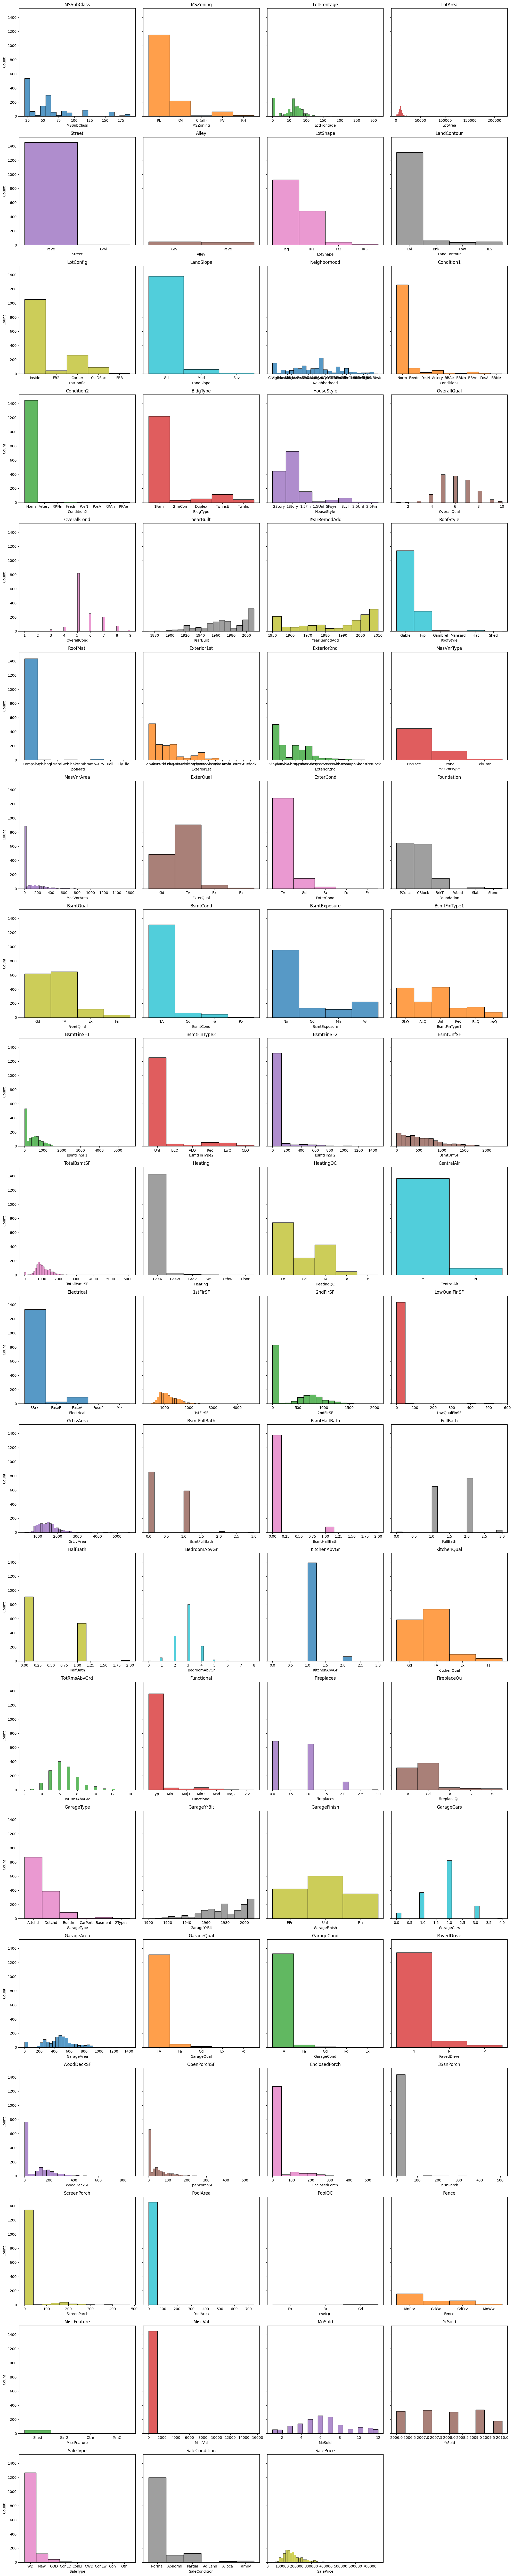

In [66]:
colors = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# create subplots
num_columns = len(train_df.columns)
plot_columns = 4
num_rows = (num_columns + 3) // plot_columns  # floor divide by 4 because you want 4 columns 
fig, axs = plt.subplots(num_rows, plot_columns, figsize=(20, 5 * num_rows), sharex=False, sharey=True)
axs = axs.flatten()  # flatten the 2D array of axes for easy iteration

# plot histograms
for i, column in enumerate(train_df.columns):
    sns.histplot(train_df[column], ax=axs[i], color=next(colors))  # use the next color in the cycle
    axs[i].set_title(column)

# this is so we can hide the unused histograms
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()

The columns with a highly skewed distribution are: Condition2, RoofMatl, LowQualFinSF, 3SsnPorch, PoolArea, MiscVal. The ones that make sense to modify are Condition2, and RoofMatl because the data type for the values in those columns is object, and columns that have values that show up once in a dataframe of this size won't help our model much. One thing we can do is use binary encoding and replace each of those columns with a column that says if it's the most popular value for that column or not.

### Binary encoding

In [67]:
train_df["Condition2"].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

We can replace the Condition2 column with IsCondition2Norm.

In [68]:
train_df["RoofMatl"].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

We can replace the RoofMatl column with IsRoofMatlCompShg.

In [69]:
for df in [train_df, test_df]:
    df["IsCondition2Norm"] = (df["Condition2"] == "Norm").astype(int)
    df["IsRoofMatlCompShg"] = (df["RoofMatl"] == "CompShg").astype(int)
    df.drop(columns=["Condition2", "RoofMatl"], inplace=True)

Another thing from the histogram we can view, is that CentralAir only has two values, so let's make this column a bunch of 1s and 0s.

In [70]:
train_df["CentralAir"] = (train_df["CentralAir"] == "Y").astype(int)
test_df["CentralAir"] = (test_df["CentralAir"] == "Y").astype(int)

Let's look at the value counts again and see if we can do more feature engineering.

In [71]:
display_column_value_counts(train_df)

MSSubClass
20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: count, dtype: int64

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: count, dtype: int64

LotFrontage
0      259
21      23
24      19
30       6
32       5
      ... 
160      1
168      1
174      2
182      1
313      2
Name: count, Length: 111, dtype: int64

LotArea
1300      1
1477      1
1491      1
1526      1
1533      2
         ..
70761     1
115149    1
159000    1
164660    1
215245    1
Name: count, Length: 1073, dtype: int64

Street
Grvl       6
Pave    1454
Name: count, dtype: int64

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

LotShape
IR1    484
IR2     41
IR3     10
Reg    925
Name: count, dtype: int64

LandContour
Bnk      63
HLS      50
Low      36
Lvl    1311
Name: count, dtype: int64

LotConfig
Corner      263
CulDSac      94
FR2          47
FR3           4
Inside     1052
Name: count, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Neighborhood
Blmngtn     17
Blueste      2
BrDale      16
BrkSide     58
ClearCr     28
CollgCr    150
Crawfor     51
Edwards    100
Gilbert     79
IDOTRR      37
MeadowV     17
Mitchel     49
NAmes      225
NPkVill      9
NWAmes      73
NoRidge     41
NridgHt     77
OldTown    113
SWISU       25
Sawyer      74
SawyerW     59
Somerst     86
StoneBr     25
Timber      38
Veenker     11
Name: count, dtype: int64

Condition1
Artery      48
Feedr       81
Norm      1260
PosA         8
PosN        19
RRAe        11
RRAn        26
RRNe         2
RRNn         5
Name: count, dtype: int64

BldgType
1Fam      1220
2fmCon      31
Duplex      52
Twnhs       43
TwnhsE     114
Name: count, dtype: int64

HouseStyle
1.5Fin    154
1.5Unf     14
1Story    726
2.5Fin      8
2.5Unf     11
2Story    445
SFoyer     37
SLvl       65
Name: count, dtype: int64

OverallQual
1       2
2       3
3      20
4     116
5     397
6     374
7     319
8     168
9      43
10     18
Name: count, dtype: int64

OverallCond
1      1
2      5
3     25
4     57
5    821
6    252
7    205
8     72
9     22
Name: count, dtype: int64

YearBuilt
1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Name: count, Length: 112, dtype: int64

YearRemodAdd
1950    178
1951      4
1952      5
1953     10
1954     14
       ... 
2006     97
2007     76
2008     40
2009     23
2010      6
Name: count, Length: 61, dtype: int64

RoofStyle
Flat         13
Gable      1141
Gambrel      11
Hip         286
Mansard       7
Shed          2
Name: count, dtype: int64

Exterior1st
AsbShng     20
AsphShn      1
BrkComm      2
BrkFace     50
CBlock       1
CemntBd     61
HdBoard    222
ImStucc      1
MetalSd    220
Plywood    108
Stone        2
Stucco      25
VinylSd    515
Wd Sdng    206
WdShing     26
Name: count, dtype: int64

Exterior2nd
AsbShng     20
AsphShn      3
Brk Cmn      7
BrkFace     25
CBlock       1
CmentBd     60
HdBoard    207
ImStucc     10
MetalSd    214
Other        1
Plywood    142
Stone        5
Stucco      26
VinylSd    504
Wd Sdng    197
Wd Shng     38
Name: count, dtype: int64

MasVnrType
BrkCmn      15
BrkFace    445
Stone      128
Name: count, dtype: int64

MasVnrArea
0       869
1         2
11        1
14        1
16        7
       ... 
1115      1
1129      1
1170      1
1378      1
1600      1
Name: count, Length: 327, dtype: int64

ExterQual
Ex     52
Fa     14
Gd    488
TA    906
Name: count, dtype: int64

ExterCond
Ex       3
Fa      28
Gd     146
Po       1
TA    1282
Name: count, dtype: int64

Foundation
BrkTil    146
CBlock    634
PConc     647
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: count, dtype: int64

BsmtCond
Fa      45
Gd      65
Po       2
TA    1311
Name: count, dtype: int64

BsmtExposure
Av    221
Gd    134
Mn    114
No    953
Name: count, dtype: int64

BsmtFinType1
ALQ    220
BLQ    148
GLQ    418
LwQ     74
Rec    133
Unf    430
Name: count, dtype: int64

BsmtFinSF1
0       467
2         1
16        9
20        5
24       12
       ... 
1904      1
2096      1
2188      1
2260      1
5644      1
Name: count, Length: 637, dtype: int64

BsmtFinType2
ALQ      19
BLQ      33
GLQ      14
LwQ      46
Rec      54
Unf    1256
Name: count, dtype: int64

BsmtFinSF2
0       1293
28         1
32         1
35         1
40         1
        ... 
1080       1
1085       1
1120       1
1127       1
1474       1
Name: count, Length: 144, dtype: int64

BsmtUnfSF
0       118
14        1
15        1
23        2
26        1
       ... 
2042      1
2046      1
2121      1
2153      1
2336      1
Name: count, Length: 780, dtype: int64

TotalBsmtSF
0       37
105      1
190      1
264      3
270      1
        ..
3094     1
3138     1
3200     1
3206     1
6110     1
Name: count, Length: 721, dtype: int64

Heating
Floor       1
GasA     1428
GasW       18
Grav        7
OthW        2
Wall        4
Name: count, dtype: int64

HeatingQC
Ex    741
Fa     49
Gd    241
Po      1
TA    428
Name: count, dtype: int64

CentralAir
0      95
1    1365
Name: count, dtype: int64

Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1334
Name: count, dtype: int64

1stFlrSF
334     1
372     1
438     1
480     1
483     7
       ..
2633    1
2898    1
3138    1
3228    1
4692    1
Name: count, Length: 753, dtype: int64

2ndFlrSF
0       829
110       1
167       1
192       1
208       1
       ... 
1611      1
1796      1
1818      1
1872      1
2065      1
Name: count, Length: 417, dtype: int64

LowQualFinSF
0      1434
53        1
80        3
120       1
144       1
156       1
205       1
232       1
234       1
360       2
371       1
384       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
528       1
572       1
Name: count, dtype: int64

GrLivArea
334     1
438     1
480     1
520     1
605     1
       ..
3627    1
4316    1
4476    1
4676    1
5642    1
Name: count, Length: 861, dtype: int64

BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64

BsmtHalfBath
0    1378
1      80
2       2
Name: count, dtype: int64

FullBath
0      9
1    650
2    768
3     33
Name: count, dtype: int64

HalfBath
0    913
1    535
2     12
Name: count, dtype: int64

BedroomAbvGr
0      6
1     50
2    358
3    804
4    213
5     21
6      7
8      1
Name: count, dtype: int64

KitchenAbvGr
0       1
1    1392
2      65
3       2
Name: count, dtype: int64

KitchenQual
Ex    100
Fa     39
Gd    586
TA    735
Name: count, dtype: int64

TotRmsAbvGrd
2       1
3      17
4      97
5     275
6     402
7     329
8     187
9      75
10     47
11     18
12     11
14      1
Name: count, dtype: int64

Functional
Maj1      14
Maj2       5
Min1      31
Min2      34
Mod       15
Sev        1
Typ     1360
Name: count, dtype: int64

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

FireplaceQu
Ex     24
Fa     33
Gd    380
Po     20
TA    313
Name: count, dtype: int64

GarageType
2Types       6
Attchd     870
Basment     19
BuiltIn     88
CarPort      9
Detchd     387
Name: count, dtype: int64

GarageYrBlt
1900     1
1906     1
1908     1
1910     3
1914     2
        ..
2006    59
2007    49
2008    29
2009    21
2010     3
Name: count, Length: 97, dtype: int64

GarageFinish
Fin    352
RFn    422
Unf    605
Name: count, dtype: int64

GarageCars
0     81
1    369
2    824
3    181
4      5
Name: count, dtype: int64

GarageArea
0       81
160      2
164      1
180      9
186      1
        ..
1220     1
1248     1
1356     1
1390     1
1418     1
Name: count, Length: 441, dtype: int64

GarageQual
Ex       3
Fa      48
Gd      14
Po       3
TA    1311
Name: count, dtype: int64

GarageCond
Ex       2
Fa      35
Gd       9
Po       7
TA    1326
Name: count, dtype: int64

PavedDrive
N      90
P      30
Y    1340
Name: count, dtype: int64

WoodDeckSF
0      761
12       2
24       2
26       2
28       2
      ... 
668      1
670      1
728      1
736      1
857      1
Name: count, Length: 274, dtype: int64

OpenPorchSF
0      656
4        1
8        1
10       1
11       1
      ... 
406      1
418      1
502      1
523      1
547      1
Name: count, Length: 202, dtype: int64

EnclosedPorch
0      1252
19        1
20        1
24        1
30        1
       ... 
301       1
318       1
330       1
386       1
552       1
Name: count, Length: 120, dtype: int64

3SsnPorch
0      1436
23        1
96        1
130       1
140       1
144       2
153       1
162       1
168       3
180       2
182       1
196       1
216       2
238       1
245       1
290       1
304       1
320       1
407       1
508       1
Name: count, dtype: int64

ScreenPorch
0      1344
40        1
53        1
60        1
63        1
       ... 
385       1
396       1
410       1
440       1
480       1
Name: count, Length: 76, dtype: int64

PoolArea
0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: count, dtype: int64

PoolQC
Ex    2
Fa    2
Gd    3
Name: count, dtype: int64

Fence
GdPrv     59
GdWo      54
MnPrv    157
MnWw      11
Name: count, dtype: int64

MiscFeature
Gar2     2
Othr     2
Shed    49
TenC     1
Name: count, dtype: int64

MiscVal
0        1408
54          1
350         1
400        11
450         4
480         2
500         8
560         1
600         4
620         1
700         5
800         1
1150        1
1200        2
1300        1
1400        1
2000        4
2500        1
3500        1
8300        1
15500       1
Name: count, dtype: int64

MoSold
1      58
2      52
3     106
4     141
5     204
6     253
7     234
8     122
9      63
10     89
11     79
12     59
Name: count, dtype: int64

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

SaleType
COD        43
CWD         4
Con         2
ConLD       9
ConLI       5
ConLw       5
New       122
Oth         3
WD       1267
Name: count, dtype: int64

SaleCondition
Abnorml     101
AdjLand       4
Alloca       12
Family       20
Normal     1198
Partial     125
Name: count, dtype: int64

SalePrice
34900     1
35311     1
37900     1
39300     1
40000     1
         ..
582933    1
611657    1
625000    1
745000    1
755000    1
Name: count, Length: 663, dtype: int64

IsCondition2Norm
0      15
1    1445
Name: count, dtype: int64

IsRoofMatlCompShg
0      26
1    1434
Name: count, dtype: int64

After looking at the value counts again, there's a lot of feature engineering we can do.

### Combining columns

Let's combine some columns. We can do BsmtFullBath and FullBath into FullBath, BsmtHalfBath and HalfBath into HalfBath. We can also combine MoSold and YrSold into a single DateSold column, but since many of the models we'll be doing later require numerical values, we'll leave them be.

In [72]:
for df in [train_df, test_df]:
    df["FullBath"] += df["BsmtFullBath"]
    df["HalfBath"] += df["BsmtHalfBath"]
    df.drop(columns=["BsmtFullBath", "BsmtHalfBath"], inplace=True)

Now, let's do something for the columns with a few options, but each option has a decent representation in the data.

### Categorical encoding

We can't just take a categorical variable and put it into a machine learning model, since models can only work with numbers in matrices. Let's convert the categorical values into a matrix form by encoding them.

One-hot encoding will work for some categorical columns, the columns with few values and many rows for each of those values are. We will use target encoding for the other categorical columns

Let's split up the categorical columns into 2 arrays, one with the columns that'll be used for one-hot encoding, and another for the columns that'll be used for target encoding. The columns with 5 or less unique values will be used for one-hot encoding.

In [73]:
one_hot_encoding_columns = []
target_encoding_columns = []

for column in train_df.columns:
    if train_df[column].dtype == "object":
        if len(train_df[column].value_counts()) <= 5:
            one_hot_encoding_columns.append(column)
        else:
            target_encoding_columns.append(column)

Before we modify the dataframes, let's calculate the sale price for the categorical variables.

In [74]:
global_mean = train_df["SalePrice"].mean()

for col in target_encoding_columns:
    df_group = train_df.groupby(by=col)["SalePrice"].agg(["mean"])
    df_group["diff"] = df_group["mean"] - global_mean
    df_group["risk"] = df_group["mean"] / global_mean
    display(df_group)

,mean,diff,risk
Neighborhood,,,
Blmngtn,194870.882353,13949.686463,1.077104
Blueste,137500.000000,-43421.195890,0.759999
BrDale,104493.750000,-76427.445890,0.577565
BrkSide,124834.051724,-56087.144166,0.689991
ClearCr,212565.428571,31644.232681,1.174906
CollgCr,197965.773333,17044.577443,1.094210
Crawfor,210624.725490,29703.529600,1.164179
Edwards,128219.700000,-52701.495890,0.708705
Gilbert,192854.506329,11933.310439,1.065959


,mean,diff,risk
Condition1,,,
Artery,135091.666667,-45829.529224,0.746688
Feedr,142475.481481,-38445.714409,0.787500
Norm,184495.492063,3574.296173,1.019756
PosA,225875.000000,44953.804110,1.248472
PosN,215184.210526,34263.014636,1.189381
RRAe,138400.000000,-42521.195890,0.764974
RRAn,184396.615385,3475.419494,1.019210
RRNe,190750.000000,9828.804110,1.054326
RRNn,212400.000000,31478.804110,1.173992


,mean,diff,risk
HouseStyle,,,
1.5Fin,143116.740260,-37804.455631,0.791045
1.5Unf,110150.000000,-70771.195890,0.608829
1Story,175985.477961,-4935.717929,0.972719
2.5Fin,220000.000000,39078.804110,1.215999
2.5Unf,157354.545455,-23566.650436,0.869741
2Story,210051.764045,29130.568155,1.161012
SFoyer,135074.486486,-45846.709404,0.746593
SLvl,166703.384615,-14217.811275,0.921414


,mean,diff,risk
RoofStyle,,,
Flat,194690.000000,13768.804110,1.076104
Gable,171483.956179,-9437.239712,0.947838
Gambrel,148909.090909,-32012.104981,0.823061
Hip,218876.933566,37955.737676,1.209792
Mansard,180568.428571,-352.767319,0.998050
Shed,225000.000000,44078.804110,1.243635


,mean,diff,risk
Exterior1st,,,
AsbShng,107385.550000,-73535.645890,0.593549
AsphShn,100000.000000,-80921.195890,0.552727
BrkComm,71000.000000,-109921.195890,0.392436
BrkFace,194573.000000,13651.804110,1.075457
CBlock,105000.000000,-75921.195890,0.580363
CemntBd,231690.655738,50769.459847,1.280616
HdBoard,163077.450450,-17843.745440,0.901373
ImStucc,262000.000000,81078.804110,1.448144
MetalSd,149422.177273,-31499.018618,0.825896


,mean,diff,risk
Exterior2nd,,,
AsbShng,114060.550000,-66860.645890,0.630443
AsphShn,138000.000000,-42921.195890,0.762763
Brk Cmn,126714.285714,-54206.910176,0.700384
BrkFace,195818.000000,14896.804110,1.082339
CBlock,105000.000000,-75921.195890,0.580363
CmentBd,230093.833333,49172.637443,1.271790
HdBoard,167661.565217,-13259.630673,0.926710
ImStucc,252070.000000,71148.804110,1.393259
MetalSd,149803.172897,-31118.022993,0.828002


,mean,diff,risk
Foundation,,,
BrkTil,132291.075342,-48630.120548,0.731208
CBlock,149805.714511,-31115.481379,0.828016
PConc,225230.442040,44309.246150,1.244909
Slab,107365.625000,-73555.570890,0.593439
Stone,165959.166667,-14962.029224,0.917301
Wood,185666.666667,4745.470776,1.026229


,mean,diff,risk
BsmtFinType1,,,
ALQ,161573.068182,-19348.127709,0.893058
BLQ,149493.655405,-31427.540485,0.826292
GLQ,235413.720096,54492.524205,1.301195
LwQ,151852.702703,-29068.493188,0.839331
Rec,146889.248120,-34031.947770,0.811896
Unf,170670.576744,-10250.619146,0.943342


,mean,diff,risk
BsmtFinType2,,,
ALQ,209942.105263,29020.909373,1.160406
BLQ,151101.000000,-29820.195890,0.835176
GLQ,180982.142857,60.946967,1.000337
LwQ,164364.130435,-16557.065456,0.908485
Rec,164917.129630,-16004.066261,0.911541
Unf,184694.690287,3773.494396,1.020857


,mean,diff,risk
Heating,,,
Floor,72500.000000,-108421.195890,0.400727
GasA,182021.195378,1099.999488,1.006080
GasW,166632.166667,-14289.029224,0.921021
Grav,75271.428571,-105649.767319,0.416045
OthW,125750.000000,-55171.195890,0.695054
Wall,92100.000000,-88821.195890,0.509061


,mean,diff,risk
Functional,,,
Maj1,153948.142857,-26973.053033,0.850913
Maj2,85800.000000,-95121.195890,0.474240
Min1,146385.483871,-34535.712019,0.809112
Min2,144240.647059,-36680.548832,0.797257
Mod,168393.333333,-12527.862557,0.930755
Sev,129000.000000,-51921.195890,0.713018
Typ,183429.147059,2507.951168,1.013862


,mean,diff,risk
GarageType,,,
2Types,151283.333333,-29637.862557,0.836184
Attchd,202892.656322,21971.460431,1.121442
Basment,160570.684211,-20350.511680,0.887517
BuiltIn,254751.738636,73830.542746,1.408081
CarPort,109962.111111,-70959.084779,0.607790
Detchd,134091.162791,-46830.033100,0.741158


,mean,diff,risk
SaleType,,,
COD,143973.255814,-36947.940076,0.795779
CWD,210600.000000,29678.804110,1.164043
Con,269600.000000,88678.804110,1.490152
ConLD,138780.888889,-42140.307002,0.767079
ConLI,200390.000000,19468.804110,1.107609
ConLw,143700.000000,-37221.195890,0.794268
New,274945.418033,94024.222142,1.519697
Oth,119850.000000,-61071.195890,0.662443
WD,173401.836622,-7519.359268,0.958438


,mean,diff,risk
SaleCondition,,,
Abnorml,146526.623762,-34394.572128,0.809892
AdjLand,104125.000000,-76796.195890,0.575527
Alloca,167377.416667,-13543.779224,0.925140
Family,149600.000000,-31321.195890,0.826879
Normal,175202.219533,-5718.976358,0.968390
Partial,272291.752000,91370.556110,1.505030


It seems that all of the columns are very important to the sale price, there are no columns for us to remove here. Now let's do the encoding.

In [75]:
# one-hot encoding
train_df = pd.get_dummies(train_df, columns=one_hot_encoding_columns)  # get_dummies drops the original categorical columns by the encoded columns
test_df = pd.get_dummies(test_df, columns=one_hot_encoding_columns)

# target encoding
for category in target_encoding_columns:
    category_means = train_df.groupby(category)["SalePrice"].mean()
    train_df[category] = train_df[category].map(category_means)
    test_df[category] = test_df[category].map(category_means)
    train_df[category] = train_df[category].fillna(global_mean)
    test_df[category] = test_df[category].fillna(global_mean)

We have to make sure that the 2 dataframes have the same number of columns, and that they are in the same order.

### One-hot encoding using OneHotEncoder

One-hot encoding can be done using OneHotEncoder. This is often better than doing the one-hot encoding using get_dummies because OneHotEncoder saves the exploded categories into it’s object. If the total number of unique values in a categorical column is not the same for my train set vs test set, get_dummies is going to need more modifying, but OneHotEncoder will handle it with no issue.

The code below is how you could implement the one-hot encoding.

In [76]:
"""
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")  # Use `sparse_output=False` for dense arrays

# Fit on training data
encoder.fit(train_df[one_hot_encoding_columns])

# Transform training and test data
train_encoded = encoder.transform(train_df[one_hot_encoding_columns])
test_encoded = encoder.transform(test_df[one_hot_encoding_columns])

# Get feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out(one_hot_encoding_columns)

# Convert encoded arrays to DataFrames
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_feature_names, index=train_df.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_feature_names, index=test_df.index)

# Drop original categorical columns and concatenate encoded features
train_df = train_df.drop(columns=one_hot_encoding_columns).join(train_encoded_df)
test_df = test_df.drop(columns=one_hot_encoding_columns).join(test_encoded_df)
"""

'\nfrom sklearn.preprocessing import OneHotEncoder\n\n# Initialize OneHotEncoder\nencoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")  # Use `sparse_output=False` for dense arrays\n\n# Fit on training data\nencoder.fit(train_df[one_hot_encoding_columns])\n\n# Transform training and test data\ntrain_encoded = encoder.transform(train_df[one_hot_encoding_columns])\ntest_encoded = encoder.transform(test_df[one_hot_encoding_columns])\n\n# Get feature names for the encoded columns\nencoded_feature_names = encoder.get_feature_names_out(one_hot_encoding_columns)\n\n# Convert encoded arrays to DataFrames\ntrain_encoded_df = pd.DataFrame(train_encoded, columns=encoded_feature_names, index=train_df.index)\ntest_encoded_df = pd.DataFrame(test_encoded, columns=encoded_feature_names, index=test_df.index)\n\n# Drop original categorical columns and concatenate encoded features\ntrain_df = train_df.drop(columns=one_hot_encoding_columns).join(train_encoded_df)\ntest_df = test_df.drop(c

### Finalize cleaning the data

In [77]:
train_df.columns, test_df.columns

(Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        ...
        'PoolQC_Fa', 'PoolQC_Gd', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv',
        'Fence_MnWw', 'MiscFeature_Gar2', 'MiscFeature_Othr',
        'MiscFeature_Shed', 'MiscFeature_TenC'],
       dtype='object', length=152),
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'Condition1',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        ...
        'PavedDrive_Y', 'PoolQC_Ex', 'PoolQC_Gd', 'Fence_GdPrv', 'Fence_GdWo',
        'Fence_MnPrv', 'Fence_MnWw', 'MiscFeature_Gar2', 'MiscFeature_Othr',
        'MiscFeature_Shed'],
       dtype='object', length=147))

Let's add those columns missing from test_df into it, and then sort the columns so that they line up.

In [78]:
for column in [column for column in train_df.columns if column not in test_df.columns and column != "SalePrice"]:
    test_df[column] = False

test_df = test_df[train_df.columns.drop("SalePrice")]

Let's change all of the dtypes for the columns that use bool features.

In [79]:
for column in train_df.dtypes[train_df.dtypes == "bool"].index:
    train_df[column] = train_df[column].astype(int)
    test_df[column] = test_df[column].astype(int)

Let's see if train_df or test_df still have any null values.

In [80]:
for column in train_df.columns:
    if train_df[column].isnull().sum():
        print(column, train_df[column].isnull().sum(), train_df[column].dtype)

In [81]:
for column in test_df.columns:
    if test_df[column].isnull().sum():
        print(column, test_df[column].isnull().sum(), test_df[column].dtype)

BsmtFinSF1 1 float64
BsmtFinSF2 1 float64
BsmtUnfSF 1 float64
TotalBsmtSF 1 float64
FullBath 2 float64
HalfBath 2 float64
GarageCars 1 float64
GarageArea 1 float64


test_df still has some null values, but those value names make it seem like we can just make those null values into 0s.

In [82]:
for column in test_df.columns:
    if test_df[column].isnull().sum():
        test_df[column] = test_df[column].fillna(0)

Finally, we can start modeling.

## Step 4: Modeling

This is where we build various models and evaluate them. Before testing any models, we can split the train_df into train_split_df and val_split_df dataframes. This is helpful because we can evaluate all models on the same validation set, and we can avoid data leakage by keeping the test_df completely untouched until the final evaluation.

In [83]:
X_train, X_val, y_train, y_val = train_test_split(
    train_df.drop(columns=["SalePrice"]),
    train_df["SalePrice"],
    test_size=0.2,
    random_state=1
)

We will test a few models, starting with simpler models and gradually moving to more complex ones. This helps us establish a baseline and understand whether the added complexity of advanced models is justified.

In [84]:
X_train = train_df.drop(columns=["SalePrice"])
y_train = train_df["SalePrice"]

### Linear Regression

Linear regression is a simple statistical model that assumes a linear relationship between the input features and the target variable.

In [85]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_val_linear_regression = linear_regression.predict(X_val)

### Ridge Regression

Ridge regression is a regularized version of Linear Regression that adds an L2 penalty (sum of squared coefficients) to the loss function to prevent overfitting.

In [86]:
ridge_regression = Ridge()
ridge_regression.fit(X_train, y_train)
y_val_ridge_regression = ridge_regression.predict(X_val)

### Polynomial Regression

Polynomial regression is an extension of Linear Regression that models non-linear relationships by adding polynomial terms to the features.

In [87]:
degrees = 2  # 1 would just be linear regression, 2 would add quadratic features

polynomial_features = PolynomialFeatures(degree=degrees)
X_train_polynomial_regression = polynomial_features.fit_transform(X_train)
X_val_polynomial_regression = polynomial_features.transform(X_val)

polynomial_regression = LinearRegression()
polynomial_regression.fit(X_train_polynomial_regression, y_train)
y_val_polynomial_regression = polynomial_regression.predict(X_val_polynomial_regression)

### Random Forest

Random forest is an ensemble learning method that builds multiple decision trees during training and combines their predictions.

In [88]:
random_forest = RandomForestRegressor(n_estimators=10)
random_forest.fit(X_train, y_train)
y_val_random_forest = random_forest.predict(X_val)

### XGBoost (Gradient Boosting)

XGBoost is a scalable and efficient implementation of gradient boosting, which builds trees sequentially, with each tree correcting the errors of the previous one.

In [89]:
xgboost = XGBRegressor(random_state=1)
xgboost.fit(X_train, y_train)
y_val_xgboost = xgboost.predict(X_val)

## Step 5: Evaluation

We can create a function that helps us evaluate the models we made.

In [90]:
def evaluate_model(y_val, y_val_pred):
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    mae = mean_absolute_error(y_val, y_val_pred)
    r2 = r2_score(y_val, y_val_pred)
    return rmse, mae, r2

In [91]:
linear_regression_rmse, linear_regression_mae, linear_regression_r2 = evaluate_model(y_val, y_val_linear_regression)
print("Linear Regression - RMSE:", linear_regression_rmse, "MAE:", linear_regression_mae, "R²:", linear_regression_r2)

Linear Regression - RMSE: 21835.192645106974 MAE: 15223.651071351762 R²: 0.9331492676430576


In [92]:
ridge_regression_rmse, ridge_regression_mae, ridge_regression_r2 = evaluate_model(y_val, y_val_ridge_regression)
print("Ridge Regression - RMSE:", ridge_regression_rmse, "MAE:", ridge_regression_mae, "R²:", ridge_regression_r2)

Ridge Regression - RMSE: 23788.08385455552 MAE: 16190.581705517132 R²: 0.9206565583044363


In [93]:
polynomial_regression_rmse, polynomial_regression_mae, polynomial_regression_r2 = evaluate_model(y_val, y_val_polynomial_regression)
print("Polynomial Regression - RMSE:", polynomial_regression_rmse, "MAE:", polynomial_regression_mae, "R²:", polynomial_regression_r2)

Polynomial Regression - RMSE: 5.304715793900622e-05 MAE: 4.17340317205207e-05 R²: 1.0


In [94]:
random_forest_rmse, random_forest_mae, random_forest_r2 = evaluate_model(y_val, y_val_random_forest)
print("Random Forest - RMSE:", random_forest_rmse, "MAE:", random_forest_mae, "R²:", random_forest_r2)

Random Forest - RMSE: 13704.43970156142 MAE: 7258.251027397259 R²: 0.9736661303072143


In [95]:
xgboost_rmse, xgboost_mae, xgboost_r2 = evaluate_model(y_val, y_val_xgboost)
print("XGBoost - RMSE:", xgboost_rmse, "MAE:", xgboost_mae, "R²:", xgboost_r2)

XGBoost - RMSE: 1373.4160877170473 MAE: 996.8096923828125 R²: 0.9997355341911316


It seems that the best model we have is polynomial regression, but it might be overfitting, so let's use the test data with it and xgboost.

## Step 6: Deployment

Let's use the test data and see what we predict as the SalePrice column for that dataframe.

### Selecting the best model

In [96]:
X_test = test_df

In [97]:
X_test_polynomial_regression = polynomial_features.transform(X_test)
y_test_polynomial_regression = polynomial_regression.predict(X_test_polynomial_regression)
y_test_polynomial_regression

array([  121286.16449624, -5354747.22387691,   221058.37208021, ...,
         263171.6865107 ,   960554.79016688,   255493.18830916])

In [98]:
y_test_polynomial_regression.mean()

np.float64(149868.84056121128)

In [99]:
y_test_xgboost = xgboost.predict(X_test)
y_test_xgboost

array([117718.555, 159350.69 , 189914.05 , ..., 157472.47 , 119193.61 ,
       188362.95 ], dtype=float32)

In [100]:
y_test_xgboost.mean()

np.float32(179275.84)

In [101]:
global_mean

np.float64(180921.19589041095)

The value for y_test_xgboost seems a lot more in line with the global_mean value from the train dataset, let's go with it and save it to a csv.

In [102]:
def create_csv(model, y_test):
    pd.DataFrame({
        "Id": ids,
        "SalePrice": y_test
    }).to_csv(f"submission_{model}.csv", index=False)

In [103]:
create_csv("xgboost", y_test_xgboost)

Now we are done and can take a break.

### All models

In case you wanted to use other models.

In [104]:
predictions = {
    "linear_regression": linear_regression,
    "ridge_regression": ridge_regression,
    "polynomial_regression": polynomial_regression,
    "random_forest": random_forest,
    "xgboost": xgboost
}

# before making predictions with polynomial_regression, you need to transform X_test into polynomial features
X_test_polynomial_regression = polynomial_features.transform(X_test)

polynomial_regression = LinearRegression()
polynomial_regression.fit(X_train_polynomial_regression, y_train)

for model in ["linear_regression", "ridge_regression", "polynomial_regression", "random_forest", "xgboost"]:
    create_csv(model, predictions[model].predict(X_test_polynomial_regression if model == "polynomial_regression" else X_test))